<div style="float: left; display: flex;" >
    <img src="./logo-ifg-vertical-anapolis.png" alt="Alternative text" width="80" />
    <div>
        <b>INSTITUTO FEDERAL DE GOIÁS<br/>
        PÓS-GRADUAÇÃO EM INTELIGÊNCIA ARTIFICIAL APLICADA<br/></b>
        Disciplina: Modelagem de Dados para IA  <br/>
        Professor: Gustavo de Assis Costa <br/>
        Alunos: Lucas Tadeu Studart de Carvalho; Marcos Rodrigues Brugnaro
    </div>
</div>

### Base de dados
- Dados provenientes do site Kaggle
- https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification
- Mobile Price Classification
- Desafio é classificação de preços dos dispositivos mobile relacionando com suas características de hardware
    - 0 (low cost)
    - 1 (medium cost) 
    - 2 (high cost) 
    - 3 (very high cost)
- Dataset previamente dividido em treino e teste

### Importação de bibliotecas


In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

from collections import Counter
from itertools import combinations
import warnings

warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay 
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer

import operator
np.random.seed(101)

### Leitura dos dados

In [3]:
cellphone_data_train = pd.read_csv('cellphone-data-train.csv')
cellphone_data_test = pd.read_csv('cellphone-data-test.csv')

### Dicionário de dados

<div>
    <table>
  <tr>
    <th><span style='background-color:lightgrey'>battery_power:</span></th>
    <th><span style='background-color:lightgrey'>blue:</span></th>
    <th><span style='background-color:lightgrey'>clock_speed:</span></th>
    <th><span style='background-color:lightgrey'>dual_sim:</span></th>
    <th><span style='background-color:lightgrey'>fc:</span></th>
    <th><span style='background-color:lightgrey'>four_g:</span></th>
    <th><span style='background-color:lightgrey'>int_memory:</span></th>
  </tr>
  <tr>
    <td>Total energy a battery can store in one time measured in mAh</td>
    <td>Has bluetooth or not</td>
    <td>speed at which microprocessor executes instructions</td>
    <td>Has dual sim support or not</td>
    <td>Front Camera mega pixels</td>
    <td>Has 4G or not</td>
    <td>Internal Memory in Gigabytes</td>
  </tr>
  <tr>
    <th><span style='background-color:lightgrey'>m_dep:</span></th>
    <th><span style='background-color:lightgrey'>mobile_wt:</span></th>
    <th><span style='background-color:lightgrey'>n_cores:</span></th>
    <th><span style='background-color:lightgrey'>pc:</span></th>
    <th><span style='background-color:lightgrey'>px_height:</span></th>
    <th><span style='background-color:lightgrey'>px_width:</span></th>
    <th><span style='background-color:lightgrey'>ram:</span></th>
  </tr>
  <tr>
    <td>Mobile Depth in cm</td>
    <td>Weight of mobile phone</td>
    <td>Number of cores of processor</td>
    <td>Primary Camera mega pixels</td>
    <td>Pixel Resolution Height</td>
    <td>Pixel Resolution Width</td>
    <td>Random Access Memory in Mega Bytes</td>
  </tr>
  <tr>
    <th><span style='background-color:lightgrey'>sc_h:</span></th>
    <th><span style='background-color:lightgrey'>sc_w:</span></th>
    <th><span style='background-color:lightgrey'>talk_time:</span></th>
    <th><span style='background-color:lightgrey'>three_g:</span></th>
    <th><span style='background-color:lightgrey'>touch_screen:</span></th>
    <th><span style='background-color:lightgrey'>wifi:</span></th>
    <th><span style='background-color:lightgrey'>price_range:</span></th>
  </tr>
  <tr>
    <td>Screen Height of mobile in cm</td>
    <td>Screen Width of mobile in cm</td>
    <td>longest time that a single battery charge will last when you are</td>
    <td>Has 3G or not</td>
    <td>Has touch screen or not</td>
    <td>Has wifi or not</td>
    <td>This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).</td>
  </tr>
</table>
</div>

### Visualização dos 5 primeiros registros (dataset de treino)

In [4]:
cellphone_data_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Visualização dos 5 últimos registros (dataset de treino)

In [5]:
cellphone_data_train.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


### Exibição de informações
1. Informações sobre detalhes do Dataframe como, quantidade de entradas, tipos de dados, etc. (*info()*)
2. Dados de estatística descritiva acerca dos dados contidos no Dataframe (*describe()*)

In [6]:
# Basic information
cellphone_data_train.info()

# Describe the data
cellphone_data_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Exibição das colunas de atributos (features) do dataset

In [7]:
cellphone_data_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

### Pré-processamento inicial dos dados com objetivo de visualização dos dados numéricos e categóricos

In [8]:
cellphone_train = cellphone_data_train.astype({'blue':'object'})

cellphone_train['blue'].replace({0:'No', 1:'Yes'}, inplace=True)
cellphone_train['wifi'].replace({0:'No', 1:'Yes'}, inplace=True)
cellphone_train['four_g'].replace({0:'No', 1:'Yes'}, inplace=True)
cellphone_train['three_g'].replace({0:'No', 1:'Yes'}, inplace=True)
cellphone_train['touch_screen'].replace({0:'No', 1:'Yes'}, inplace=True)
cellphone_train['dual_sim'].replace({0:'No', 1:'Yes'}, inplace=True)
# cellphone_train['price_range'].replace({0:'0', 1:'0 -- 1', 2:'1 -- 2', 3:'2 -- 3'}, inplace=True)
cellphone_train['price_range'].replace({0:'low_cost', 1:'medium_cost', 2:'high_cost', 3:'very_high_cost'}, inplace=True)

In [9]:
cellphone_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   object 
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   object 
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   object 
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   object 
 18  touch_sc

### Criação de duas listas contendo rótulos de colunas
- A primeira especificando quais colunas contém dados dados numéricos (int, float)
- A segunda especificando quais colunas contém dados categóricos (classes distintas)

In [10]:
numerical_features = [i for i in cellphone_train.columns if cellphone_train[i].dtype != 'object']
categorical_features = [i for i in cellphone_train.columns if cellphone_train[i].dtype == 'object']

In [11]:
numerical_features

['battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time']

### Função para plotar gráficos a partir dos dados de cada coluna com dados categóricos
- Estes gráficos vão exibir a contagem de registros de cada categoria existente em cada uma das features (colunas)

In [12]:
def bar_plot(variable):
    """
        input: variable eg: "blue"
        output: barplot & count value
    """
    # Taking feature
    var = cellphone_train[variable]
    
    # count number of categorical variable
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel('Contagem')
    plt.title(variable)
    plt.show()
    print('{}: \n {} '.format(variable, varValue))

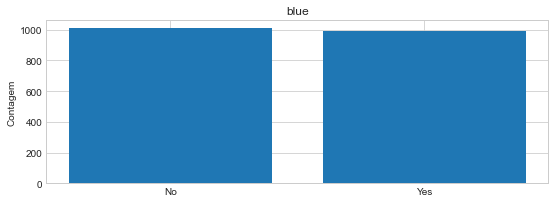

blue: 
 No     1010
Yes     990
Name: blue, dtype: int64 


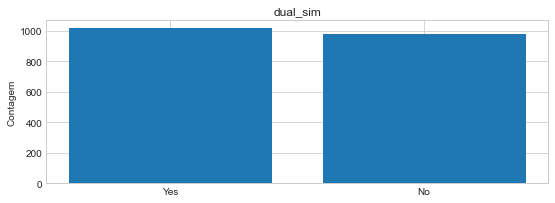

dual_sim: 
 Yes    1019
No      981
Name: dual_sim, dtype: int64 


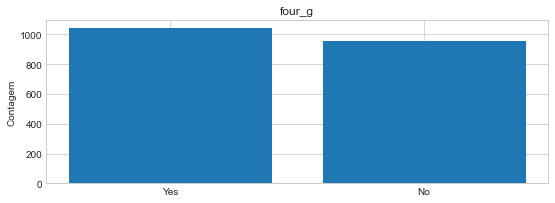

four_g: 
 Yes    1043
No      957
Name: four_g, dtype: int64 


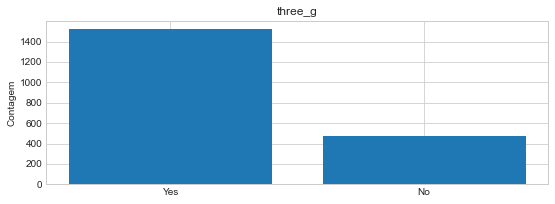

three_g: 
 Yes    1523
No      477
Name: three_g, dtype: int64 


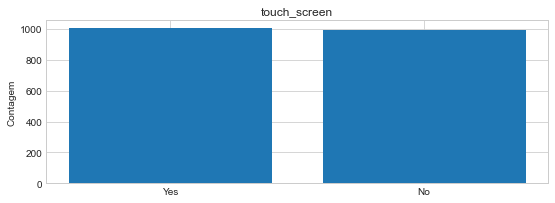

touch_screen: 
 Yes    1006
No      994
Name: touch_screen, dtype: int64 


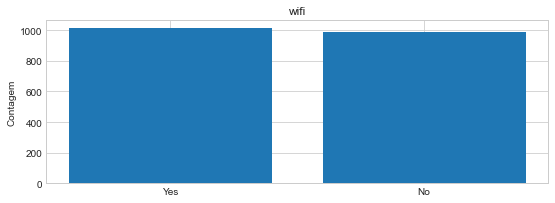

wifi: 
 Yes    1014
No      986
Name: wifi, dtype: int64 


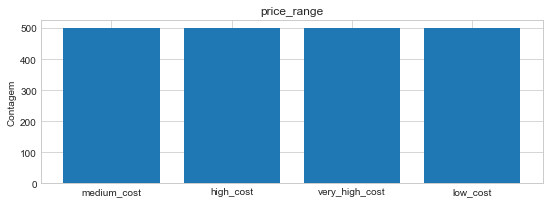

price_range: 
 medium_cost       500
high_cost         500
very_high_cost    500
low_cost          500
Name: price_range, dtype: int64 


In [13]:
for i in categorical_features:
    bar_plot(i)

### Função para plotar gráficos a partir dos dados de cada coluna com dados numéricos
- Estes gráficos vão exibir tendências e/ou distribuição dos números constantes nos registros de cada feature (coluna)

In [14]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(cellphone_train[variable], bins=50)
    plt.xlabel(variable)
    plt.ylabel('Frequência')
    plt.title('Distribuição de {} com histogramas'.format(variable))
    plt.show()

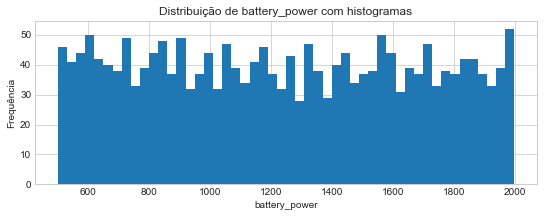

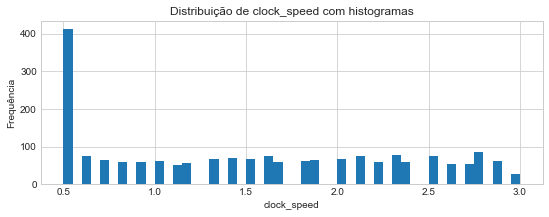

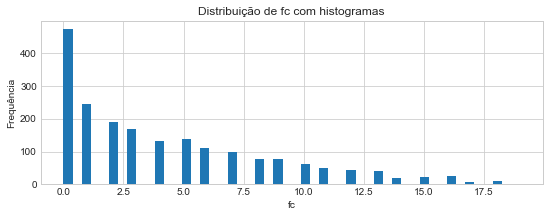

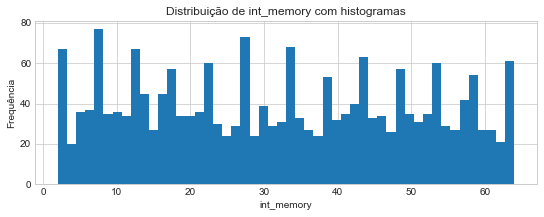

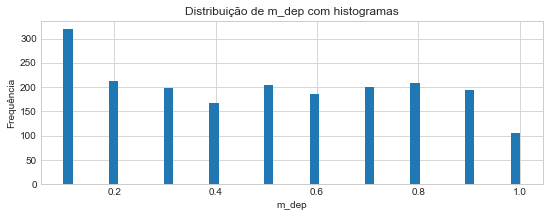

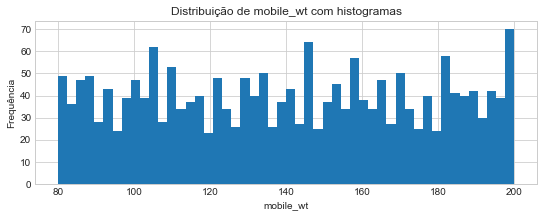

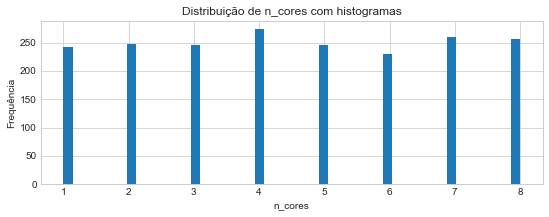

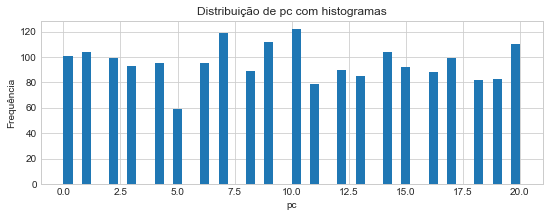

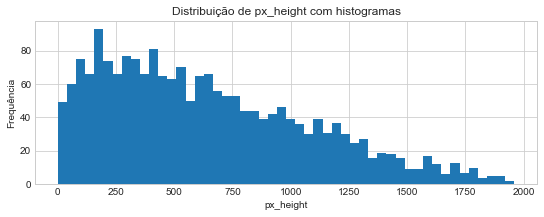

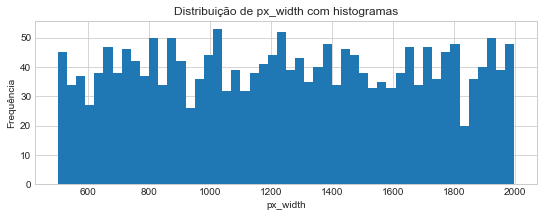

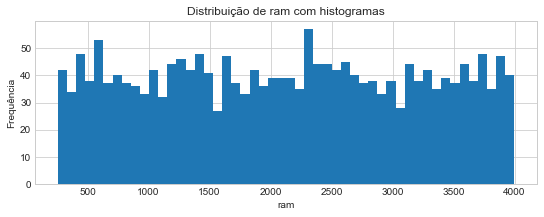

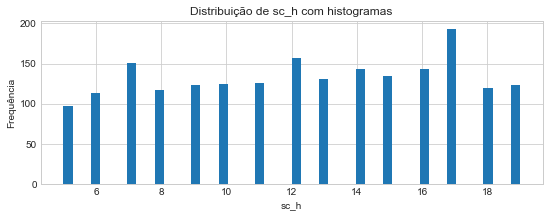

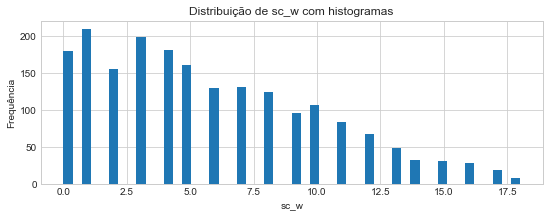

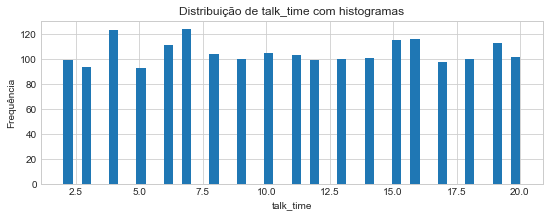

In [15]:
for i in numerical_features:
    plot_hist(i)

### Função para detecção de Outliers 

In [16]:
def outliers(df, columns):
    for col in columns:
        q3 = np.percentile(df[col],75)
        q1 = np.percentile(df[col],25)
        mean = np.mean(df[col])
        iiq = q3-q1
        LS = q3 + 1.5 * iiq
        LI = q1 - 1.5 * iiq
        
        #quantidade de outliers
        nr_outliers = df.loc[(df[col] < LI) | (df[col] > LS)].shape[0]
        
        print(f'{col:<25}: {nr_outliers}')

### Features que contêm outliers

In [17]:
outliers(cellphone_data_train, numerical_features)

battery_power            : 0
clock_speed              : 0
fc                       : 18
int_memory               : 0
m_dep                    : 0
mobile_wt                : 0
n_cores                  : 0
pc                       : 0
px_height                : 2
px_width                 : 0
ram                      : 0
sc_h                     : 0
sc_w                     : 0
talk_time                : 0


### Concatenando os datasets, gerando um único dataset com os dados de treinamento e teste

In [18]:
concatDf = pd.concat([cellphone_data_train,cellphone_data_test], axis=0).reset_index(drop=True)

In [19]:
concatDf.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,id
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1.0,NaN
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2.0,NaN
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2.0,NaN
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2.0,NaN
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1.0,NaN


In [20]:
concatDf.columns[concatDf.isnull().any()]

Index(['price_range', 'id'], dtype='object')

In [21]:
concatDf.isnull().sum()

battery_power       0
blue                0
clock_speed         0
dual_sim            0
fc                  0
four_g              0
int_memory          0
m_dep               0
mobile_wt           0
n_cores             0
pc                  0
px_height           0
px_width            0
ram                 0
sc_h                0
sc_w                0
talk_time           0
three_g             0
touch_screen        0
wifi                0
price_range      1000
id               2000
dtype: int64

In [22]:
cellphone_data_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### Considerações:
- 1000 registros com valores Nan na coluna price_range do dataset de teste
- 2000 registros com valores Nan na coluna id do dataset de teste

### Verificando quais registros contém valores Nan da feature price_range

In [23]:
concatDf[concatDf['price_range'].isnull()]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,id
2000,1043,1,1.8,1,14,0,5,0.1,193,3,...,1412,3476,12,7,2,0,1,0,NaN,1.0
2001,841,1,0.5,1,4,1,61,0.8,191,5,...,857,3895,6,0,7,1,0,0,NaN,2.0
2002,1807,1,2.8,0,1,0,27,0.9,186,3,...,1366,2396,17,10,10,0,1,1,NaN,3.0
2003,1546,0,0.5,1,18,1,25,0.5,96,8,...,1752,3893,10,0,7,1,1,0,NaN,4.0
2004,1434,0,1.4,0,11,1,49,0.5,108,6,...,810,1773,15,8,7,1,0,1,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1700,1,1.9,0,0,1,54,0.5,170,7,...,913,2121,14,8,15,1,1,0,NaN,996.0
2996,609,0,1.8,1,0,0,13,0.9,186,4,...,1632,1933,8,1,19,0,1,1,NaN,997.0
2997,1185,0,1.4,0,1,1,8,0.5,80,1,...,825,1223,5,0,14,1,0,0,NaN,998.0
2998,1533,1,0.5,1,0,0,50,0.4,171,2,...,832,2509,15,11,6,0,1,0,NaN,999.0


### Verificando quais registros contém valores Nan da feature id

In [24]:
concatDf[concatDf['id'].isnull()]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,id
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1.0,NaN
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2.0,NaN
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2.0,NaN
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2.0,NaN
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1890,668,13,4,19,1,1,0,0.0,NaN
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,1965,2032,11,10,16,1,1,1,2.0,NaN
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1632,3057,9,1,5,1,1,0,3.0,NaN
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,670,869,18,10,19,1,1,1,0.0,NaN


### Gerando gráfico boxplot relacionando capacidade de bateria e  velocidade clock

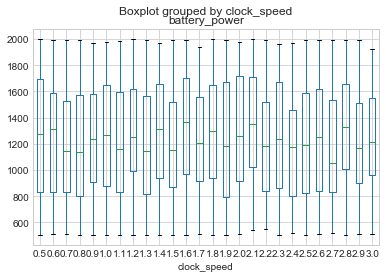

In [25]:
concatDf.boxplot(column='battery_power', by='clock_speed')
plt.show()

### Gerando gráfico boxplot relacionando capacidade de bateria e  fc

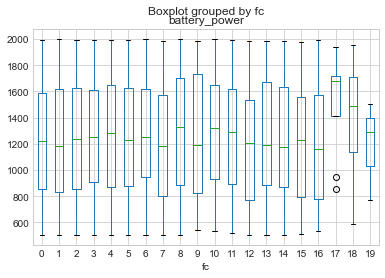

In [26]:
concatDf.boxplot(column='battery_power', by='fc')
plt.show()

### Procedimentos adicionais

In [31]:
# criando cópia do dataset de treino
df = cellphone_data_train.copy()

### Histograma de cada feature numérica

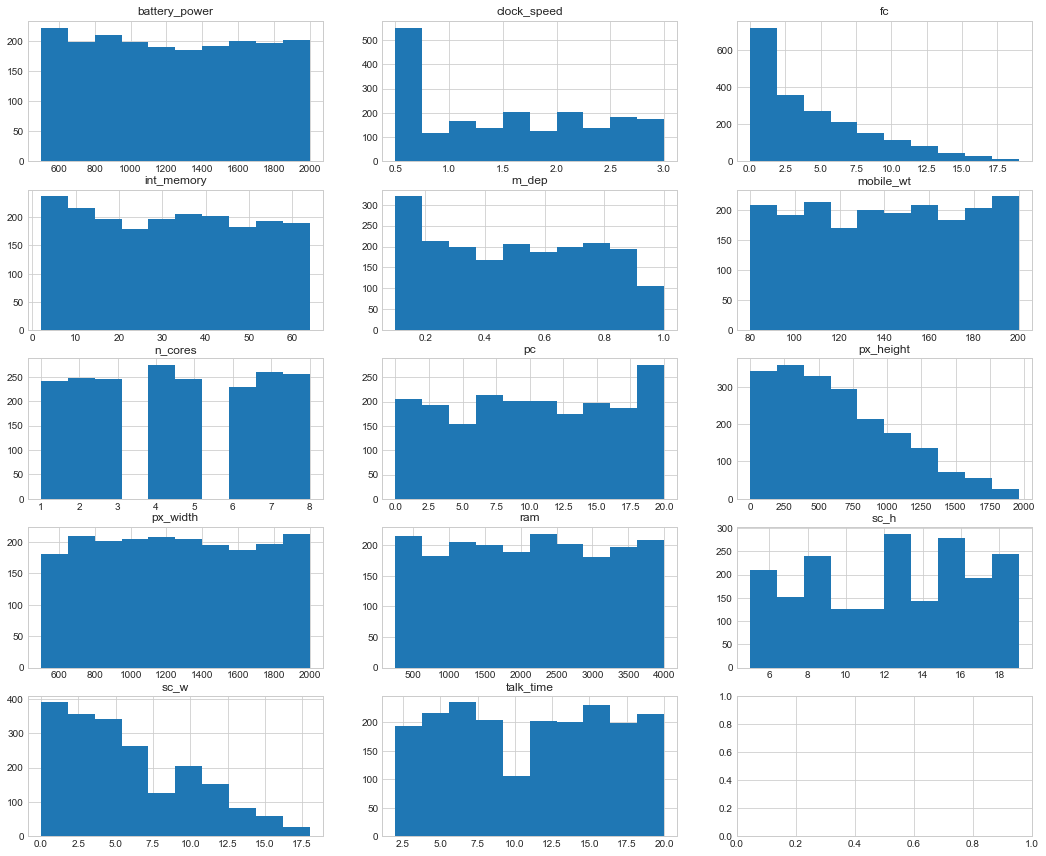

In [30]:
def plot_histograms(df):
    fig, axs = plt.subplots(5,3,figsize=(18,15))
    for i,nf in enumerate(numerical_features):
        axs[i//3, i%3].hist(df[nf])
        axs[i//3, i%3].set_title(nf)
plot_histograms(df)

 ### Removendo dados numéricos inconsistentes

- Removendo entradas inconsistentes que possuem celulares com dimensões nulas para a tela (sc_w = 0)
- Removendo entradas inconsistentes que possuem celulares com dimensões nulas para resolução de pixels em altura (px_height = 0)
- Removendo entradas inconsistentes que possuem celulares com espessura menor do que o celular mais fino já fabricado (475mm)
- Removendo entradas inconsistentes que possuem celulares com resoluções em pixels menores que o menor valor já fabricado

In [32]:
df.drop(df[df['sc_w'] == 0].index, inplace = True)
df.drop(df[df['px_height'] == 0].index, inplace = True)
df.drop(df[df['m_dep'] < 0.475].index, inplace = True)
df.drop(df[(df['px_height'] < 360) | (df['px_width'] < 320)].index, inplace = True)

In [34]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1


### Plotando histogramas após a remoção dos dados espúrios

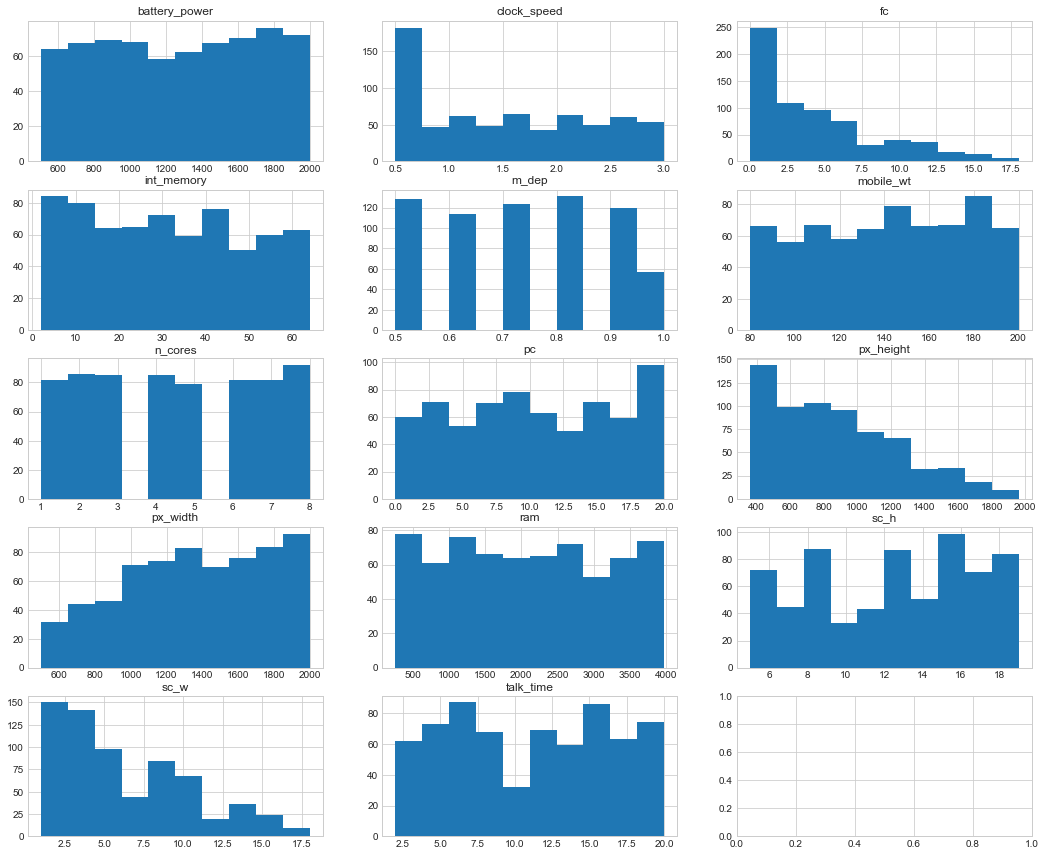

In [35]:
plot_histograms(df)

### Aproximação à Normal de features positivamente enviesadas (assimetria positiva)

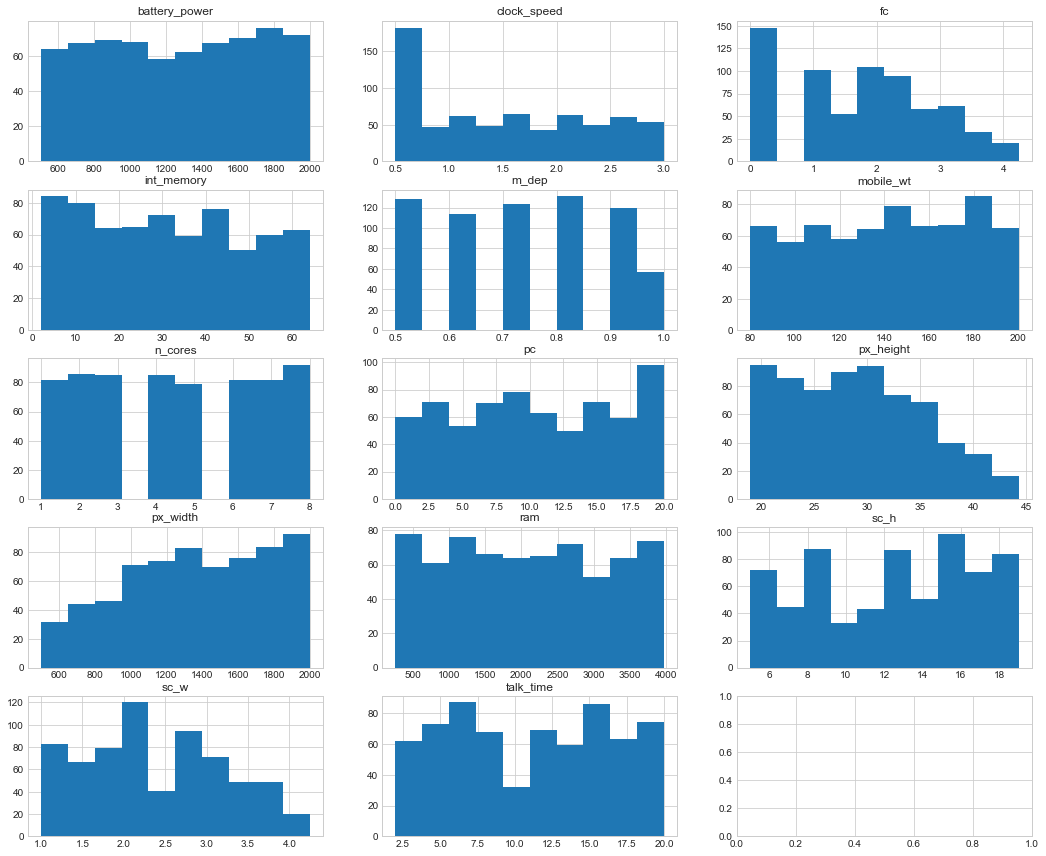

In [36]:
df['fc'] = np.sqrt(df['fc'])
df['px_height'] = np.sqrt(df['px_height'])
df['sc_w'] = np.sqrt(df['sc_w'])
plot_histograms(df)

### Capacidade da bateria versus capacidade de tempo de chamada (boxplot)

<AxesSubplot:title={'center':'battery_power'}, xlabel='talk_time'>

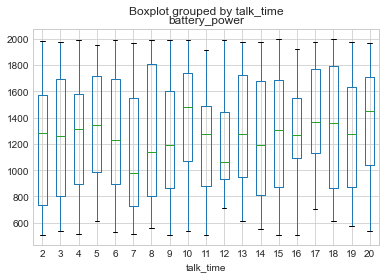

In [38]:
df.boxplot(column='battery_power', by='talk_time')

### Peso do aparelho versus volume

<AxesSubplot:title={'center':'vol'}, xlabel='mobile_wt'>

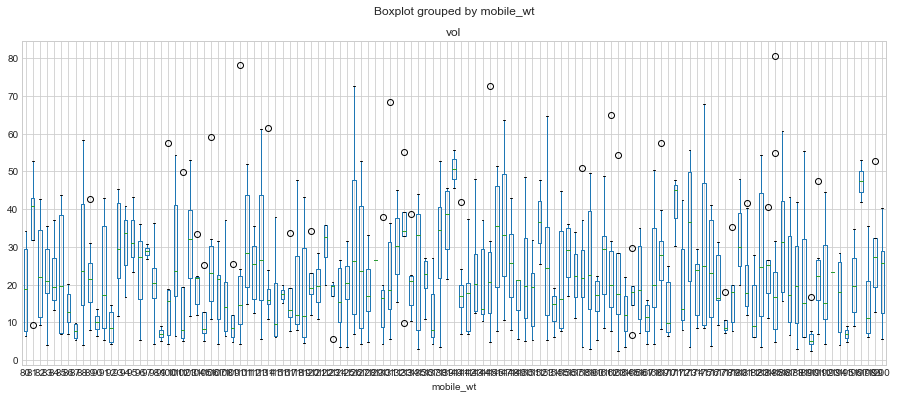

In [39]:
df['vol'] = df['sc_h']*df['sc_w']*df['m_dep']
df.boxplot(column='vol', by='mobile_wt', figsize=(15,6))

### Criação (feature engineering) da coluna de densidade dos aparelhos.


- A densidade do dispositivo é igual ao cálculo da largura dividido pelo volume

<AxesSubplot:>

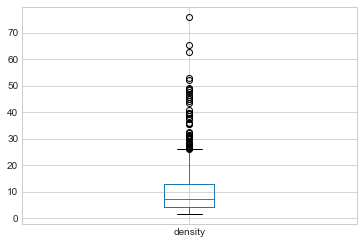

In [41]:
df['density'] = df['mobile_wt'] / df['vol'] 
df.boxplot('density')

### Quantidade de outliers por cada feature

In [43]:
def outliers(df, columns):
    for col in columns:
        q3 = np.percentile(df[col],75)
        q2 = np.median(df[col])
        q1 = np.percentile(df[col],25)
        mean = np.mean(df[col])
        iiq = q3-q1
        LS = q3 + 1.5 * iiq
        LI = q1 - 1.5 * iiq
        
        #quantidade de outliers
        nr_outliers = df.loc[(df[col] < LI) | (df[col] > LS)].shape[0]
        
        print(f'{col:<35}: {nr_outliers}')

outliers(df,numerical_features+['vol','density'])

battery_power                      : 0
clock_speed                        : 0
fc                                 : 0
int_memory                         : 0
m_dep                              : 0
mobile_wt                          : 0
n_cores                            : 0
pc                                 : 0
px_height                          : 0
px_width                           : 0
ram                                : 0
sc_h                               : 0
sc_w                               : 0
talk_time                          : 0
vol                                : 9
density                            : 51


### Substituição dos outliers por valores limite (máximo e mínimo dentro dos limites superior e inferior). 
- O objetivo é evitar a exclusão dos outliers.

In [44]:
#procedimentos realizados nos outliers
def handling_outliers(df, columns):
    for col in columns:
        q3 = np.percentile(df[col],75)
        q2 = np.median(df[col])
        q1 = np.percentile(df[col],25)
        mean = np.mean(df[col])
        iiq = q3-q1
        LS = q3 + 1.5 * iiq
        LI = q1 - 1.5 * iiq
        
        #valor estipulado para maiores que o limite
        max_val_estipulated = max(df[df[col] <= LS][col])
        #valor estipulado para menores que o limite
        min_val_estipulated = min(df[df[col] >= LI][col])
        
        #drop outliers
        #df.drop(df.loc[(df[col] < LI) | (df[col] > LS)].index, inplace=True)
        
        #substituir outliers por valores maximos ou minimos
        df[col] = np.where(df[col] < LI, min_val_estipulated, df[col])
        df[col] = np.where(df[col] > LS, max_val_estipulated, df[col])

handling_outliers(df,numerical_features+['vol','density'])
outliers(df,numerical_features+['vol','density'])

battery_power                      : 0
clock_speed                        : 0
fc                                 : 0
int_memory                         : 0
m_dep                              : 0
mobile_wt                          : 0
n_cores                            : 0
pc                                 : 0
px_height                          : 0
px_width                           : 0
ram                                : 0
sc_h                               : 0
sc_w                               : 0
talk_time                          : 0
vol                                : 0
density                            : 0


### Touch screen versus screen height (boxplot)

<AxesSubplot:title={'center':'sc_h'}, xlabel='touch_screen'>

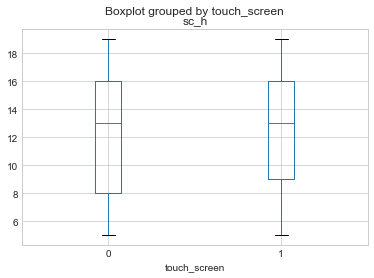

In [45]:
df.boxplot(column='sc_h', by='touch_screen')

### Exibição da matriz de correlação, para verificar as variáveis com maior correlação entre si.

In [48]:
pd.set_option('display.max_columns', None)

# filtrando correlações maiores que 0.5
#df.corr()[abs(df.corr()) > 0.5]

df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,vol,density
battery_power,1.000000,0.047704,-0.011887,-0.070218,0.044904,0.039444,0.006397,-0.027494,0.004019,-0.023750,0.042471,0.052006,0.048553,-0.065947,-0.077484,-0.105158,0.067278,0.040418,0.013883,0.058188,0.134028,-0.107293,0.111215
blue,0.047704,1.000000,0.025206,0.013354,0.012664,0.052097,0.039171,0.005838,-0.019912,0.020903,0.007104,-0.060576,-0.079482,0.062613,-0.028546,-0.013620,-0.005971,0.016582,-0.028195,-0.007365,0.068791,-0.035331,-0.017349
clock_speed,-0.011887,0.025206,1.000000,0.048395,-0.058091,-0.049902,-0.004493,0.031055,-0.027534,-0.002190,-0.038866,0.034192,0.046844,-0.028915,-0.042655,0.007939,-0.066312,-0.080545,0.010857,-0.017509,-0.033459,-0.011139,-0.032928
dual_sim,-0.070218,0.013354,0.048395,1.000000,-0.002978,0.028751,-0.068121,-0.001587,-0.026727,-0.048374,-0.032687,-0.039328,0.020562,0.016950,-0.014060,-0.050324,-0.044512,-0.045816,0.061513,0.022974,-0.002506,-0.036837,0.016757
fc,0.044904,0.012664,-0.058091,-0.002978,1.000000,-0.031758,-0.067486,0.014546,0.020906,-0.034922,0.661764,0.006357,-0.007539,0.027616,-0.071954,-0.043907,-0.033629,-0.025586,0.007259,-0.014744,0.032716,-0.065936,0.056913
four_g,0.039444,0.052097,-0.049902,0.028751,-0.031758,1.000000,0.055915,0.012711,-0.020757,-0.039325,-0.041772,0.009753,0.029860,0.052444,0.097830,0.067659,-0.053258,0.581994,0.056544,-0.006291,0.075784,0.100100,-0.076512
int_memory,0.006397,0.039171,-0.004493,-0.068121,-0.067486,0.055915,1.000000,-0.029003,0.033497,-0.018764,-0.070310,0.057680,0.047647,-0.008491,0.080193,0.020601,0.009491,0.000235,0.033110,-0.002498,0.037471,0.019435,-0.043800
m_dep,-0.027494,0.005838,0.031055,-0.001587,0.014546,0.012711,-0.029003,1.000000,0.049377,-0.005034,0.051038,0.023334,-0.001339,-0.012724,0.043936,0.039098,0.071685,-0.054368,0.025311,-0.037780,-0.012470,0.358225,-0.291920
mobile_wt,0.004019,-0.019912,-0.027534,-0.026727,0.020906,-0.020757,0.033497,0.049377,1.000000,0.034584,-0.002430,-0.067309,-0.034298,0.015964,-0.030818,-0.008313,0.002658,-0.024364,0.050784,0.002635,-0.030324,-0.002482,0.290615
n_cores,-0.023750,0.020903,-0.002190,-0.048374,-0.034922,-0.039325,-0.018764,-0.005034,0.034584,1.000000,-0.040299,-0.022046,0.063529,-0.026784,0.071672,0.100062,0.009033,-0.030600,0.008874,0.022289,0.004928,0.096692,-0.052689


### Vejamos o quanto cada atributo se correlaciona com price_range

In [52]:
corr_matrix = df.corr()
corr_matrix['price_range'].sort_values(ascending=False)

price_range      1.000000
ram              0.916406
px_height        0.144518
px_width         0.139451
battery_power    0.134028
four_g           0.075784
blue             0.068791
three_g          0.051981
talk_time        0.042123
sc_h             0.041857
int_memory       0.037471
pc               0.034113
fc               0.032716
wifi             0.032347
vol              0.013413
n_cores          0.004928
dual_sim        -0.002506
density         -0.004166
sc_w            -0.007119
m_dep           -0.012470
mobile_wt       -0.030324
clock_speed     -0.033459
touch_screen    -0.037869
Name: price_range, dtype: float64

### Plotando alguns atributos numéricos em relação a qualquer outro atributo numérico
- Matriz de dispersão

array([[<AxesSubplot:xlabel='price_range', ylabel='price_range'>,
        <AxesSubplot:xlabel='ram', ylabel='price_range'>,
        <AxesSubplot:xlabel='px_height', ylabel='price_range'>,
        <AxesSubplot:xlabel='px_width', ylabel='price_range'>],
       [<AxesSubplot:xlabel='price_range', ylabel='ram'>,
        <AxesSubplot:xlabel='ram', ylabel='ram'>,
        <AxesSubplot:xlabel='px_height', ylabel='ram'>,
        <AxesSubplot:xlabel='px_width', ylabel='ram'>],
       [<AxesSubplot:xlabel='price_range', ylabel='px_height'>,
        <AxesSubplot:xlabel='ram', ylabel='px_height'>,
        <AxesSubplot:xlabel='px_height', ylabel='px_height'>,
        <AxesSubplot:xlabel='px_width', ylabel='px_height'>],
       [<AxesSubplot:xlabel='price_range', ylabel='px_width'>,
        <AxesSubplot:xlabel='ram', ylabel='px_width'>,
        <AxesSubplot:xlabel='px_height', ylabel='px_width'>,
        <AxesSubplot:xlabel='px_width', ylabel='px_width'>]], dtype=object)

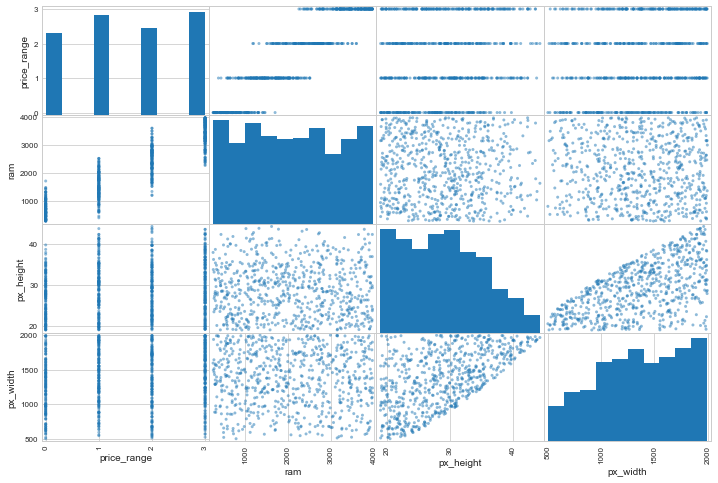

In [78]:
from pandas.plotting import scatter_matrix

attributes = ['price_range', 'ram', 'px_height', 'px_width']

scatter_matrix(df[attributes], figsize=(12,8))

- A diagonal principal (superior esquerda até a parte inferior direita) seria cada variável em relação a si mesma, o que não é muito util. Pandas exibe um histograma 

### Observando correlação entre px_height e px_width
- Quanto maior a altura do dispositivo maior o comprimento

<AxesSubplot:xlabel='px_height', ylabel='px_width'>

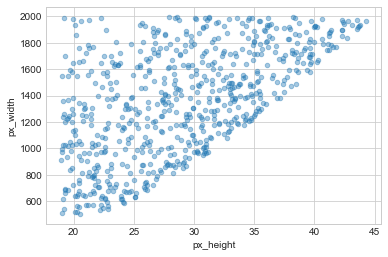

In [77]:
df.plot(kind='scatter', x='px_height', y='px_width', alpha=0.4)

### Quanto mais elevado o preço, mais elevada a memória RAM do dispositivo. A correlação é bastante acentuada: 0.917.

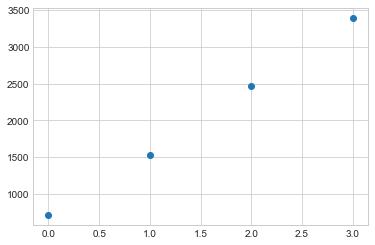

In [81]:
plt.scatter(df.groupby(by=['price_range'])['ram'].mean().index, df.groupby(by=['price_range'])['ram'].mean().values)

### Densidade do aparelho versus comprimento

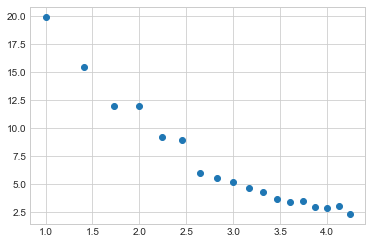

In [82]:
plt.scatter(df.groupby(by=['sc_w'])['density'].mean().index, df.groupby(by=['sc_w'])['density'].mean().values)

### Densidade do aparelho versus altura

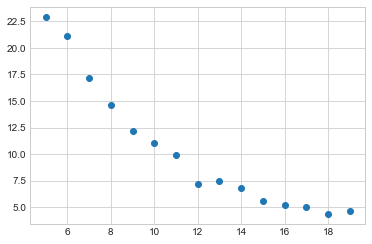

In [43]:
plt.scatter(df.groupby(by=['sc_h'])['density'].mean().index, df.groupby(by=['sc_h'])['density'].mean().values)

### Densidade do aparelho versus espessura

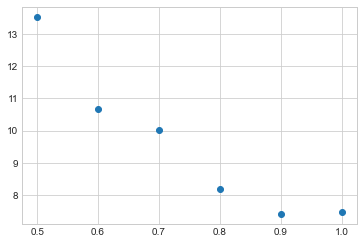

In [44]:
plt.scatter(df.groupby(by=['m_dep'])['density'].mean().index, df.groupby(by=['m_dep'])['density'].mean().values)

### Cálculo das polegadas da tela e da densidade de pixels

In [84]:
df['pol'] = ((df['sc_w'] ** 2 + df['sc_h'] ** 2) ** 0.5) / 2.54
df['pol'].value_counts()

#pixels por polegada
df['ppi'] = (df['px_width'] * df['px_height']) / df['pol']
df['ppi'].value_counts()

8889.615164     1
11090.527800    1
14747.502564    1
17741.044895    1
3756.703511     1
               ..
5878.213207     1
7406.325072     1
10361.079925    1
12439.461424    1
2203.089779     1
Name: ppi, Length: 673, dtype: int64

### Verificando correlação após criação de novas features

In [85]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,vol,density,pol,ppi
battery_power,1.000000,0.047704,-0.011887,-0.070218,0.044904,0.039444,0.006397,-0.027494,0.004019,-0.023750,0.042471,0.052006,0.048553,-0.065947,-0.077484,-0.105158,0.067278,0.040418,0.013883,0.058188,0.134028,-0.107293,0.111215,-0.079627,0.081825
blue,0.047704,1.000000,0.025206,0.013354,0.012664,0.052097,0.039171,0.005838,-0.019912,0.020903,0.007104,-0.060576,-0.079482,0.062613,-0.028546,-0.013620,-0.005971,0.016582,-0.028195,-0.007365,0.068791,-0.035331,-0.017349,-0.028599,-0.032231
clock_speed,-0.011887,0.025206,1.000000,0.048395,-0.058091,-0.049902,-0.004493,0.031055,-0.027534,-0.002190,-0.038866,0.034192,0.046844,-0.028915,-0.042655,0.007939,-0.066312,-0.080545,0.010857,-0.017509,-0.033459,-0.011139,-0.032928,-0.041994,0.036510
dual_sim,-0.070218,0.013354,0.048395,1.000000,-0.002978,0.028751,-0.068121,-0.001587,-0.026727,-0.048374,-0.032687,-0.039328,0.020562,0.016950,-0.014060,-0.050324,-0.044512,-0.045816,0.061513,0.022974,-0.002506,-0.036837,0.016757,-0.015353,0.000046
fc,0.044904,0.012664,-0.058091,-0.002978,1.000000,-0.031758,-0.067486,0.014546,0.020906,-0.034922,0.661764,0.006357,-0.007539,0.027616,-0.071954,-0.043907,-0.033629,-0.025586,0.007259,-0.014744,0.032716,-0.065936,0.056913,-0.072198,0.047259
four_g,0.039444,0.052097,-0.049902,0.028751,-0.031758,1.000000,0.055915,0.012711,-0.020757,-0.039325,-0.041772,0.009753,0.029860,0.052444,0.097830,0.067659,-0.053258,0.581994,0.056544,-0.006291,0.075784,0.100100,-0.076512,0.098178,-0.028578
int_memory,0.006397,0.039171,-0.004493,-0.068121,-0.067486,0.055915,1.000000,-0.029003,0.033497,-0.018764,-0.070310,0.057680,0.047647,-0.008491,0.080193,0.020601,0.009491,0.000235,0.033110,-0.002498,0.037471,0.019435,-0.043800,0.079317,0.013206
m_dep,-0.027494,0.005838,0.031055,-0.001587,0.014546,0.012711,-0.029003,1.000000,0.049377,-0.005034,0.051038,0.023334,-0.001339,-0.012724,0.043936,0.039098,0.071685,-0.054368,0.025311,-0.037780,-0.012470,0.358225,-0.291920,0.044492,-0.030171
mobile_wt,0.004019,-0.019912,-0.027534,-0.026727,0.020906,-0.020757,0.033497,0.049377,1.000000,0.034584,-0.002430,-0.067309,-0.034298,0.015964,-0.030818,-0.008313,0.002658,-0.024364,0.050784,0.002635,-0.030324,-0.002482,0.290615,-0.030445,-0.011278
n_cores,-0.023750,0.020903,-0.002190,-0.048374,-0.034922,-0.039325,-0.018764,-0.005034,0.034584,1.000000,-0.040299,-0.022046,0.063529,-0.026784,0.071672,0.100062,0.009033,-0.030600,0.008874,0.022289,0.004928,0.096692,-0.052689,0.073917,-0.019397


In [86]:
corr_matrix = df.corr()
corr_matrix['price_range'].sort_values(ascending=False)

price_range      1.000000
ram              0.916406
px_height        0.144518
px_width         0.139451
battery_power    0.134028
ppi              0.103427
four_g           0.075784
blue             0.068791
three_g          0.051981
talk_time        0.042123
sc_h             0.041857
pol              0.041344
int_memory       0.037471
pc               0.034113
fc               0.032716
wifi             0.032347
vol              0.013413
n_cores          0.004928
dual_sim        -0.002506
density         -0.004166
sc_w            -0.007119
m_dep           -0.012470
mobile_wt       -0.030324
clock_speed     -0.033459
touch_screen    -0.037869
Name: price_range, dtype: float64

### Padronização (se a distribuição se aproxima mais da normal) ou Normalização (demais casos). Evitar numerosidade.

In [45]:
# pd.plotting.scatter_matrix(df[numerical_features],figsize=(20,20));

# #STANDARD SCALER
# scaler = StandardScaler()
# df[numerical_features] = scaler.fit_transform(df[numerical_features])
# to_drop = ['m_dep','sc_w','sc_w']
# if(len(df.columns.intersection(to_drop))):
#     df.drop(to_drop, axis=1, inplace=True)
# df

# #MIN MAX SCALER
# scaler = MinMaxScaler()
# df[numerical_features] = scaler.fit_transform(df[numerical_features])
# to_drop = ['m_dep','sc_w','sc_w']
# if(len(df.columns.intersection(to_drop))):
#     df.drop(to_drop, axis=1, inplace=True)
# df



### Remoção de features que se tornaram combinação linear de outras features

In [87]:
to_drop = ['sc_w', 'sc_h', 'px_width', 'px_height', 'm_dep', 'mobile_wt']
if(len(df.columns.intersection(to_drop))):
    df.drop(df.columns.intersection(to_drop), axis = 1, inplace = True)

In [90]:
# df = df[df.columns.intersection(['battery_power','ram','ppi','price_range'])]
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,price_range,vol,density,pol,ppi
1,1021,1,0.5,1,0.000000,1,53,3,6,2631,7,1,1,0,2,20.611405,6.598289,6.727562,8889.615164
2,563,1,0.5,1,1.414214,1,41,5,6,2603,9,1,1,0,2,14.000714,10.356614,4.366353,13966.903087
3,615,1,2.5,0,0.000000,0,10,6,9,2769,11,1,0,0,2,36.203867,3.618398,6.396881,9735.987221
4,1821,1,1.2,0,3.605551,1,44,2,14,1411,15,1,1,0,1,6.788225,20.771262,3.198440,13170.365751
5,1859,0,0.5,1,1.732051,0,22,1,7,1067,10,1,0,0,1,11.900000,13.781513,6.704483,7816.945414


### Alguns dados estatísticos

In [95]:
df.describe()

,battery_power,clock_speed,fc,int_memory,n_cores,pc,ram,talk_time,price_range,vol,density,pol,ppi,blue_0,blue_1,dual_sim_0,dual_sim_1,four_g_0,four_g_1,three_g_0,three_g_1,touch_screen_0,touch_screen_1,wifi_0,wifi_1
count,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000
mean,1265.136701,1.500149,1.696313,31.280832,4.526003,9.968796,2086.203566,11.002972,1.569094,22.432474,9.760786,4.988169,9378.135336,0.500743,0.499257,0.506686,0.493314,0.481426,0.518574,0.239227,0.760773,0.479941,0.520059,0.475483,0.524517
std,437.397868,0.808208,1.184885,18.042358,2.313841,6.063693,1096.568671,5.478311,1.114726,14.394660,7.146981,1.676458,5846.963887,0.500371,0.500371,0.500327,0.500327,0.500027,0.500027,0.426929,0.426929,0.499969,0.499969,0.499770,0.499770
min,503.000000,0.500000,0.000000,2.000000,1.000000,0.000000,262.000000,2.000000,0.000000,2.500000,1.404154,2.007488,1355.483455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,875.000000,0.700000,1.000000,15.000000,3.000000,5.000000,1142.000000,6.000000,1.000000,10.392305,4.333333,3.565112,5098.677280,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1278.000000,1.400000,1.732051,30.000000,4.000000,10.000000,2042.000000,11.000000,2.000000,19.798990,7.245180,5.163337,8123.993582,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,1659.000000,2.200000,2.645751,46.000000,7.000000,15.000000,3035.000000,16.000000,3.000000,31.678384,13.025065,6.445160,12085.344071,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1997.000000,3.000000,4.242641,64.000000,8.000000,20.000000,3970.000000,20.000000,3.000000,61.654927,26.000000,7.664536,35368.392620,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Analisando gráfico de barras de price_range
- Maioria dos dispositivos na categoria very high cost (3)

<AxesSubplot:>

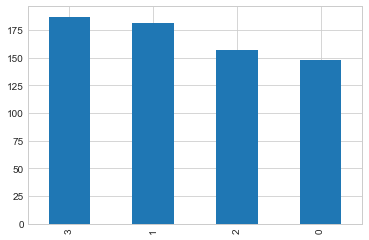

In [96]:
df.price_range.value_counts().plot(kind='bar')

### Mapa de calor com correlações

<AxesSubplot:>

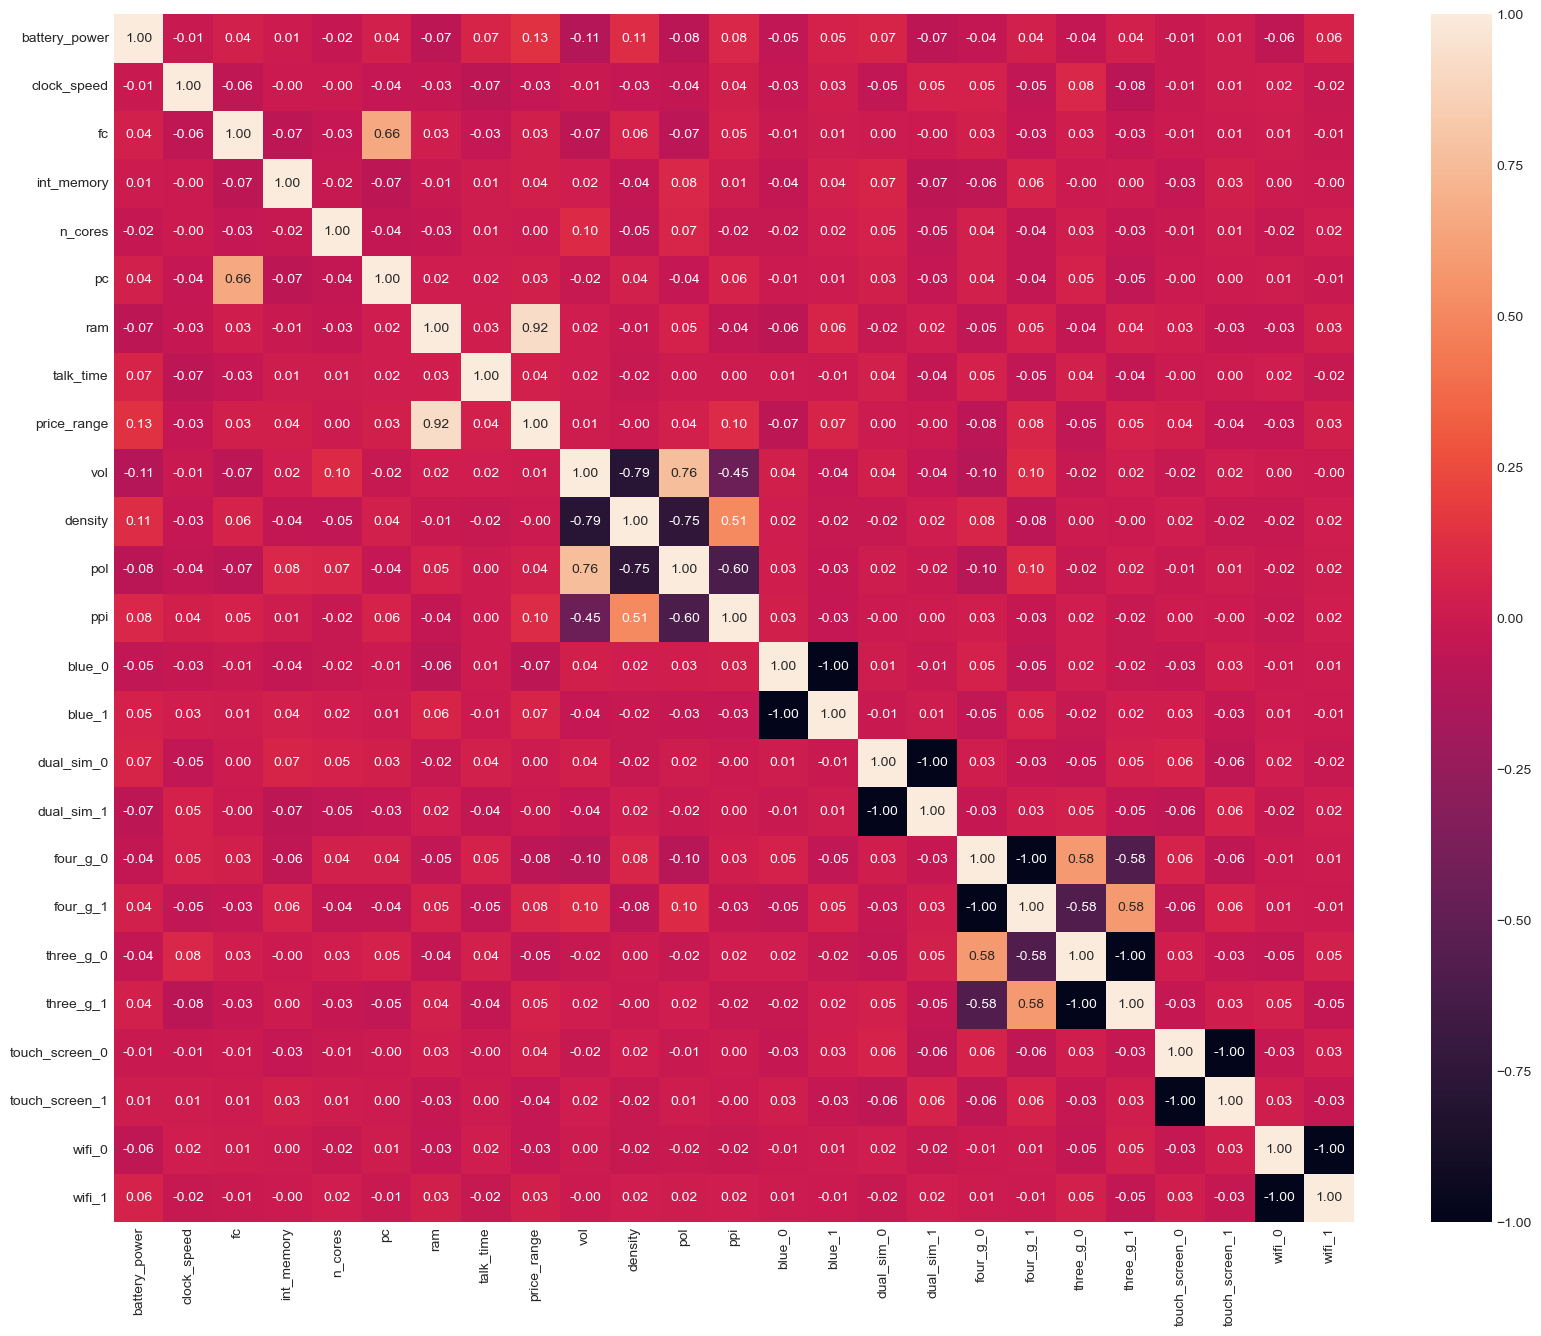

In [97]:
df_corr = df.corr()
plt.figure(figsize=(20,16), dpi=100)
sns.heatmap(data=df_corr, annot=True, fmt='.2f')

### Aplicação de algoritmos sem tratamentos

In [91]:
#one hot encoding em colunas categóricas
categorical_cols = [i for i in categorical_features if i != 'price_range']
df_dum = pd.get_dummies(data=cellphone_data_train, columns=categorical_cols)

#separação em treino e teste
X = df_dum.drop(['price_range'], axis=1)
y = df_dum['price_range']

modelos = []
modelos.append(('AB', AdaBoostClassifier()))
modelos.append(('LR', LogisticRegression()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('DTC', DecisionTreeClassifier()))
modelos.append(('GNB', GaussianNB()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('SVM', SVC()))

for modelo in modelos:
    nome = modelo[0]
    modelo_aplicado = modelo[1]
    
    skfold = StratifiedKFold(n_splits=5)
    resultados = cross_val_score(modelo_aplicado, X,y, cv=skfold, scoring='accuracy')
    print(f'Acurácia de {nome}: {resultados.mean()}')

Acurácia de AB: 0.658
Acurácia de LR: 0.6365000000000001
Acurácia de KNN: 0.9195
Acurácia de DTC: 0.8175000000000001
Acurácia de GNB: 0.805
Acurácia de LDA: 0.9475
Acurácia de SVM: 0.9480000000000001


### Aplicação de algoritmos com tratamentos

In [154]:
#one hot encoding em colunas categóricas
if(len(df.columns.intersection(categorical_cols))):
    df = pd.get_dummies(data=df, columns=categorical_cols)


#separação em treino e teste
X = df.drop(['price_range'], axis=1)
y = df['price_range']

modelos = []
modelos.append(('AB', AdaBoostClassifier()))
modelos.append(('GBC', GradientBoostingClassifier()))
modelos.append(('LR', LogisticRegression()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('DTC', DecisionTreeClassifier()))
modelos.append(('GNB', GaussianNB()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('SVM', SVC()))

for modelo in modelos:
    nome = modelo[0]
    modelo_aplicado = modelo[1]
    
    skfold = StratifiedKFold(n_splits=5)
    resultados = cross_val_score(modelo_aplicado, X,y, cv=skfold, scoring='accuracy')
    print(f'Acurácia de {nome}: {resultados.mean()}')

Acurácia de AB: 0.6463571033720287
Acurácia de GBC: 0.8350801547816473
Acurácia de LR: 0.5735876174682145
Acurácia de KNN: 0.7816362631288005
Acurácia de DTC: 0.7742067440574903
Acurácia de GNB: 0.7562741846323936
Acurácia de LDA: 0.9003980099502489
Acurácia de SVM: 0.7844886677722498


In [93]:
df.columns.intersection(to_drop)

Index([], dtype='object')